In [15]:
import numpy as np

X = np.load("rgb_means_n=4.npy")
y = np.load("pandas_bears_y.npy")

print(X.shape)
print(y.shape)

(600, 3)
(600,)


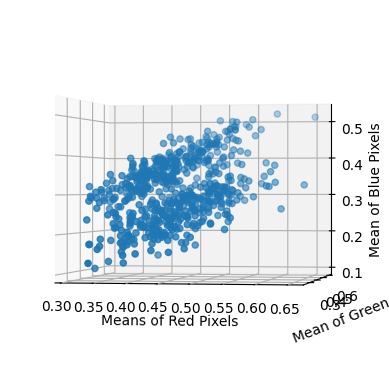

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Set labels 
ax.set_xlabel("Means of Red Pixels")
ax.set_ylabel('Mean of Green Pixels')
ax.set_zlabel('Mean of Blue Pixels')

# Set viewing angle (elevation, azimuth)
ax.view_init(0, 6400)


# Show the plot
plt.show()


split data

In [17]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(450, 3) (150, 3) (450,) (150,)


Initialize SVM clf

In [20]:
svc = LinearSVC(C=10, loss="hinge")

svc.fit(X_train, y_train)

C:\Users\hunte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, loss='hinge')

In [26]:
from sklearn.metrics import accuracy_score

y_test_pred = svc.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.96

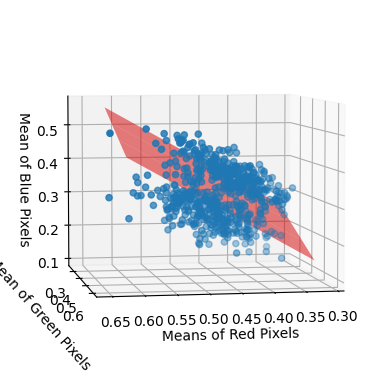

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


#plot hyperplane

# Get the coefficients and intercept of the hyperplane
coef = svc.coef_[0]
intercept = svc.intercept_[0]

# Define the meshgrid of points
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the corresponding z-values for the decision boundary
z = (-intercept - coef[0] * xx - coef[1] * yy) / coef[2]

ax.plot_surface(xx, yy, z, alpha=0.5, color='red')


# Set labels
ax.set_xlabel("Means of Red Pixels")
ax.set_ylabel('Mean of Green Pixels')
ax.set_zlabel('Mean of Blue Pixels')

ax.view_init(5, 800)

plt.show()